<a href="https://colab.research.google.com/github/crzysab/Data-Covid19-using-Python/blob/main/Covid19_SumateraUtara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Eksplorasi dan Analisis Data COVID-19 Indonesia using Python**

___

Akses Data untuk Indonesia

In [1]:
import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json')

In [2]:
resp

<Response [200]>

In [3]:
resp.headers

{'Server': 'nginx', 'Date': 'Mon, 06 Sep 2021 10:13:02 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Mon, 06 Sep 2021 10:10:03 GMT', 'ETag': 'W/"6135e8fb-3443b"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}

In [4]:
cov_id_raw = resp.json()
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


In [5]:
cov_id_update.keys()

dict_keys(['penambahan', 'harian', 'total'])

Melihat Jumlah Data untuk Indonesia

In [6]:
print('Tanggal pembaharuan data penambahan kasus   :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh  :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal  :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini  :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini  :', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus   : 2021-09-05
Jumlah penambahan kasus sembuh  : 10191
Jumlah penambahan kasus meninggal  : 392
Jumlah total kasus positif hingga saat ini  : 4129020
Jumlah total kasus meninggal hingga saat ini  : 135861


Akses Data Sumatera Utara

In [7]:
resp_sumut = requests.get('https://data.covid19.go.id/public/api/prov_detail_SUMATERA_UTARA.json')
cov_sumut_raw = resp_sumut.json()

In [8]:
resp_sumut

<Response [200]>

In [9]:
for item in cov_sumut_raw.keys() :
  print(item)

last_date
provinsi
kasus_total
kasus_tanpa_tgl
kasus_dengan_tgl
meninggal_persen
meninggal_tanpa_tgl
meninggal_dengan_tgl
sembuh_persen
sembuh_tanpa_tgl
sembuh_dengan_tgl
list_perkembangan
data


Melihat Data untuk Wilayah Sumatera Utara

In [11]:
print('\nJumlah total kasus COVID-19 di Sumatera Utara                 : %d' %cov_sumut_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Sumatera Utara         : %f.2%%' %cov_sumut_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Sumatera Utara : %f.2%%' %cov_sumut_raw['sembuh_persen'])


Jumlah total kasus COVID-19 di Sumatera Utara                 : 99219
Persentase kematian akibat COVID-19 di Sumatera Utara         : 2.482387.2%
Persentase tingkat kesembuhan dari COVID-19 di Sumatera Utara : 79.459579.2%


In [12]:
import numpy as np
import pandas as pd

cov_sumut = pd.DataFrame(cov_sumut_raw['list_perkembangan'])
print('Info cov_sumut:\n', cov_sumut.info())
print('\nLima data teratas cov_sumut:\n', cov_sumut.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       538 non-null    int64
 1   KASUS                         538 non-null    int64
 2   MENINGGAL                     538 non-null    int64
 3   SEMBUH                        538 non-null    int64
 4   DIRAWAT_OR_ISOLASI            538 non-null    int64
 5   AKUMULASI_KASUS               538 non-null    int64
 6   AKUMULASI_SEMBUH              538 non-null    int64
 7   AKUMULASI_MENINGGAL           538 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  538 non-null    int64
dtypes: int64(9)
memory usage: 38.0 KB
Info cov_sumut:
 None

Lima data teratas cov_sumut:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1584403200000      1  ...                    1                             0
1  1584489600000 

In [13]:
import numpy as np
import pandas as pd

cov_sumut_tidy = (cov_sumut.drop(columns=[item for item in cov_sumut.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_sumut_tidy['tanggal'] = pd.to_datetime(cov_sumut_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_sumut_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-17           1          1       0
1 2020-03-18           0          0       0
2 2020-03-19           0          0       0
3 2020-03-20           0          0       0
4 2020-03-21           0          0       0


In [15]:
cov_sumut_tidy.columns

Index(['tanggal', 'kasus_baru', 'meninggal', 'sembuh'], dtype='object')

Visualisasi Data Covid-19 wilayah Sumatera Utara

<BarContainer object of 538 artists>

<Figure size 432x288 with 0 Axes>

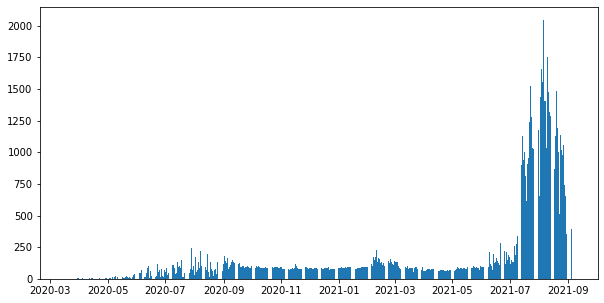

In [16]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_sumut_tidy, x='tanggal', height='kasus_baru')

<Figure size 432x288 with 0 Axes>

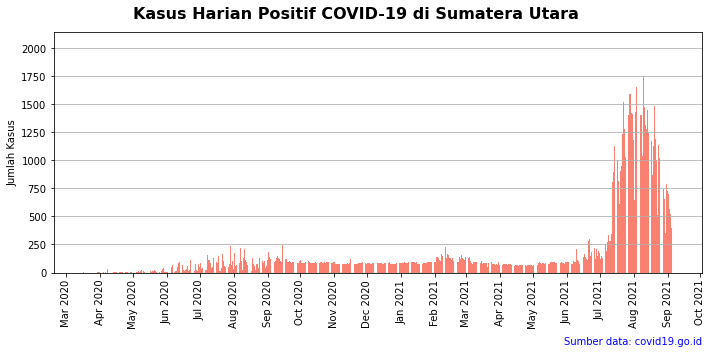

In [17]:
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_sumut_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle("Kasus Harian Positif COVID-19 di Sumatera Utara", 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title(" ",fontsize=10)
ax.set_xlabel('')
ax.set_ylabel("Jumlah Kasus")
ax.text(1, -0.3, "Sumber data: covid19.go.id", color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

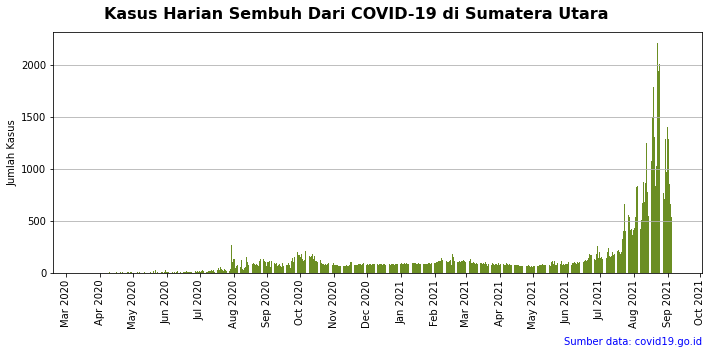

In [18]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_sumut_tidy, x='tanggal', height='sembuh', color='olivedrab')
fig.suptitle("Kasus Harian Sembuh Dari COVID-19 di Sumatera Utara", 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title(" ",fontsize=10)
ax.set_xlabel('')
ax.set_ylabel("Jumlah Kasus")
ax.text(1, -0.3, "Sumber data: covid19.go.id", color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

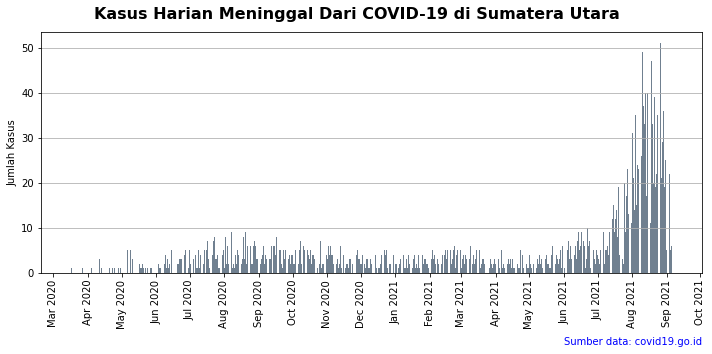

In [19]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_sumut_tidy, x='tanggal', height='meninggal', color='slategrey')
fig.suptitle("Kasus Harian Meninggal Dari COVID-19 di Sumatera Utara", 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title(" ",fontsize=10)
ax.set_xlabel('')
ax.set_ylabel("Jumlah Kasus")
ax.text(1, -0.3, "Sumber data: covid19.go.id", color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Melihat Data Mingguan

In [23]:
cov_sumut_mingguan = (cov_sumut_tidy.set_index('tanggal')['kasus_baru']
.resample('W')
.sum()
.reset_index()
.rename(columns={'kasus_baru': 'jumlah'})
)
cov_sumut_mingguan['tahun'] = cov_sumut_mingguan['tanggal'].apply(lambda x: x.year)
cov_sumut_mingguan['minggu_ke'] = cov_sumut_mingguan['tanggal'].apply(lambda x: x.weekofyear)
cov_sumut_mingguan = cov_sumut_mingguan[['tahun', 'minggu_ke', 'jumlah']]

print('Info cov_sumut_mingguan:')
print(cov_sumut_mingguan.info())
print('\nLima data teratas cov_sumut_mingguan:\n', cov_sumut_mingguan.head(10))

Info cov_sumut_mingguan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tahun      77 non-null     int64
 1   minggu_ke  77 non-null     int64
 2   jumlah     77 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB
None

Lima data teratas cov_sumut_mingguan:
    tahun  minggu_ke  jumlah
0   2020         12       1
1   2020         13       0
2   2020         14      17
3   2020         15      40
4   2020         16      16
5   2020         17      30
6   2020         18      12
7   2020         19      56
8   2020         20      39
9   2020         21      93


In [24]:
cov_sumut_mingguan['jumlah_pekanlalu'] = cov_sumut_mingguan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_sumut_mingguan['lebih_baik'] = cov_sumut_mingguan['jumlah'] < cov_sumut_mingguan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_sumut_mingguan.head(10))

Sepuluh data teratas:
    tahun  minggu_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020         12       1                 0       False
1   2020         13       0                 1        True
2   2020         14      17                 0       False
3   2020         15      40                17       False
4   2020         16      16                40        True
5   2020         17      30                16       False
6   2020         18      12                30        True
7   2020         19      56                12       False
8   2020         20      39                56        True
9   2020         21      93                39       False


Visualisasi Data Mingguan

<Figure size 432x288 with 0 Axes>

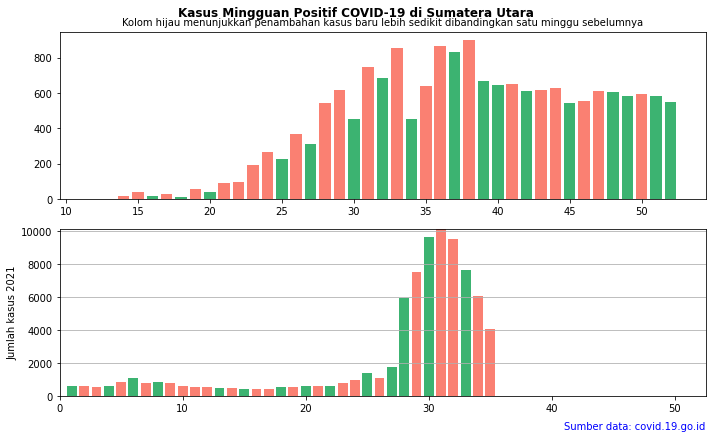

In [26]:
plt.clf()
jml_tahun_terjadi_covid19 = cov_sumut_mingguan['tahun'].nunique()
tahun_terjadi_covid19 = cov_sumut_mingguan['tahun'].unique()
fig,axes = plt.subplots(nrows=jml_tahun_terjadi_covid19, figsize=(10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Mingguan Positif COVID-19 di Sumatera Utara', y=1.00, fontweight='bold', ha='center')
for i,ax in enumerate(axes):
  ax.bar(data=cov_sumut_mingguan.loc[cov_sumut_mingguan['tahun']==tahun_terjadi_covid19[i]], x = 'minggu_ke', height='jumlah', color=['mediumseagreen' if x is True else 'salmon' for x in cov_sumut_mingguan['lebih_baik']])
  if i == 0:
    ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu minggu sebelumnya', fontsize=10)
  elif i == jml_tahun_terjadi_covid19 - 1 :
    ax.text(1,-0.2,'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)
    
    ax.set_xlim([0, 52.5])
    ax.set_ylim([0, max(cov_sumut_mingguan['jumlah'])])
    ax.set_xlabel('')
    ax.set_ylabel('Jumlah kasus %d' %(tahun_terjadi_covid19[i],))
    ax.grid(axis='y')

plt.tight_layout()
plt.show()
																			